<a href="https://colab.research.google.com/github/rajy4683/S12EVA4/blob/master/S12EVA4_Annotations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import json
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import sys

Mounted at /content/drive


### Sample Image from dataset

In [0]:
from PIL import Image, ImageDraw
image = Image.open("/content/drive/My Drive/EVA4/tiny_imagenet/EVA4S12_Imgs/00000000.jpg")
draw = ImageDraw.Draw(image)
draw.rectangle([2,12,109,209], fill=None, outline="yellow")
draw.rectangle([121,21,231,212], fill=None, outline="yellow")

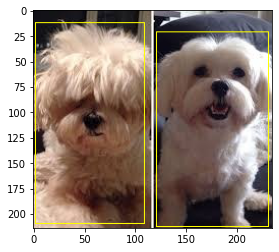

In [5]:
fig,ax = plt.subplots()
ax.imshow(image)
#ax.add_line()

### Extracting data
1. The image_height and image_width parameters are otained from coco formatted JSON file
2. From the annotations Json file(project.json) rest of the attributes (class_name, x,y,h and w) are obtained 




In [0]:
with open('/content/drive/My Drive/EVA4/S12EVA4/coco.json') as f:
  data_coco = json.load(f)

In [7]:
data_coco.keys()

dict_keys(['info', 'images', 'annotations', 'licenses', 'categories'])

In [8]:
len(data_coco['annotations'])

114

In [0]:
json_formatted_str = json.dumps(data_coco, indent=2)

print(json_formatted_str)

In [0]:
with open('/content/drive/My Drive/EVA4/S12EVA4/project.json') as projfile:
  data_proj = json.load(projfile)

In [0]:
#print(data_proj)
json_formatted_str = json.dumps(data_proj, indent=2)

print(json_formatted_str)

In [15]:
data_coco['images'] 

[{'coco_url': 'adutta_swan.jpg',
  'date_captured': '',
  'file_name': 'adutta_swan.jpg',
  'flickr_url': 'adutta_swan.jpg',
  'height': 400,
  'id': 0,
  'license': 1,
  'width': 600},
 {'coco_url': 'wikimedia_death_of_socrates.jpg',
  'date_captured': '',
  'file_name': 'wikimedia_death_of_socrates.jpg',
  'flickr_url': 'wikimedia_death_of_socrates.jpg',
  'height': 394,
  'id': 1,
  'license': 1,
  'width': 600},
 {'date_captured': '',
  'file_name': '00000000.jpg',
  'height': 214,
  'id': 2,
  'license': 1,
  'width': 235},
 {'date_captured': '',
  'file_name': '00000001.jpg',
  'height': 225,
  'id': 3,
  'license': 1,
  'width': 225},
 {'date_captured': '',
  'file_name': '00000002.jpg',
  'height': 181,
  'id': 4,
  'license': 1,
  'width': 279},
 {'date_captured': '',
  'file_name': '00000003.jpg',
  'height': 167,
  'id': 5,
  'license': 1,
  'width': 301},
 {'date_captured': '',
  'file_name': '00000004.jpg',
  'height': 164,
  'id': 6,
  'license': 1,
  'width': 308},
 {'da

In [19]:
for val in data_coco['images']:
    print(val.keys())

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'flickr_url', 'coco_url', 'date_captured'])
dict_keys(['id', 'width', 'height', 'file_name', 'license', 'flickr_url', 'coco_url', 'date_captured'])
dict_keys(['id', 'width', 'height', 'file_name', 'license', 'date_captured'])
dict_keys(['id', 'width', 'height', 'file_name', 'license', 'date_captured'])
dict_keys(['id', 'width', 'height', 'file_name', 'license', 'date_captured'])
dict_keys(['id', 'width', 'height', 'file_name', 'license', 'date_captured'])
dict_keys(['id', 'width', 'height', 'file_name', 'license', 'date_captured'])
dict_keys(['id', 'width', 'height', 'file_name', 'license', 'date_captured'])
dict_keys(['id', 'width', 'height', 'file_name', 'license', 'date_captured'])
dict_keys(['id', 'width', 'height', 'file_name', 'license', 'date_captured'])
dict_keys(['id', 'width', 'height', 'file_name', 'license', 'date_captured'])
dict_keys(['id', 'width', 'height', 'file_name', 'license', 'date_captured'])
dict_keys(['

In [0]:
image_dims = [ (val['width'],val['height']) for val in data_coco['images'] ]

In [0]:
for key,shape in zip(list(data_proj.keys()),image_dims):
    data_proj[key]['img_width']=shape[0]
    data_proj[key]['img_height']=shape[1]

In [22]:
large_array=[]
for key,value in data_proj.items():
    base_info = [value['filename'], value['img_width'], value['img_height']]
    if(len(value['regions']) <=0 ):
        continue
    region_final_arr=[]
    for region_itr in value['regions']:
        region_final_arr = [value['filename'], 
                            value['img_width'], 
                            value['img_height'],
                            region_itr['region_attributes']['name'], 
                            region_itr['region_attributes']['type']
                            ]
        bbox_dims = [v for k,v in region_itr['shape_attributes'].items() if (k != 'name')]
        region_final_arr.extend(bbox_dims)
        large_array.append(region_final_arr)
        print( region_final_arr)
        #region_final_arr.append(v)
    #base_info.extend(region_final_arr)
    #large_array.append(base_info)

['adutta_swan.jpg', 600, 400, 'Swan', 'bird', [116, 94, 176, 343, 383, 385, 369, 406, 398, 364, 310, 297, 304, 244, 158], [157, 195, 264, 273, 261, 234, 222, 216, 155, 124, 135, 170, 188, 170, 175]]
['wikimedia_death_of_socrates.jpg', 600, 394, 'Plato', 'human', 174, 139, 108, 227]
['wikimedia_death_of_socrates.jpg', 600, 394, 'Socrates', 'human', 347, 114, 91, 209]
['wikimedia_death_of_socrates.jpg', 600, 394, 'Hemlock', 'cup', 316, 180, 17, 12]
['00000000.jpg', 235, 214, 'dog', 'unknown', 2, 12, 107, 197]
['00000000.jpg', 235, 214, 'dog', 'unknown', 121, 21, 110, 191]
['00000001.jpg', 225, 225, 'dog', 'unknown', 6, 25, 84, 124]
['00000001.jpg', 225, 225, 'dog', 'unknown', 98, 52, 82, 96]
['00000002.jpg', 279, 181, 'dog', 'unknown', 3, 2, 127, 174]
['00000002.jpg', 279, 181, 'dog', 'unknown', 181, 2, 78, 174]
['00000003.jpg', 301, 167, 'dog', 'unknown', 24, 9, 257, 149]
['00000004.jpg', 308, 164, 'dog', 'unknown', 11, 11, 111, 145]
['00000004.jpg', 308, 164, 'dog', 'unknown', 144, 12,

### DataFrame with base parameters

In [0]:
df_bbox = pd.DataFrame(large_array[4:], columns=['Filename','img_width','img_height','obj_class','obj_type','obj_x','obj_y','obj_width','obj_height'])

In [0]:
df_bbox['obj_x1'] = df_bbox['obj_x']+df_bbox['obj_width']
df_bbox['obj_y1'] = df_bbox['obj_y']+df_bbox['obj_height']

### Normalized parameters
1. New columns are added that contain the normalized values of x,y,h and w are added to the DataFrame.

In [0]:
df_bbox['trans_obj_width'] = np.log(df_bbox['obj_width']/df_bbox['img_width'])
df_bbox['trans_obj_height'] = np.log(df_bbox['obj_height']/df_bbox['img_height'])

df_bbox['trans_obj_x'] = df_bbox['obj_x']/df_bbox['img_width']
df_bbox['trans_obj_y'] = df_bbox['obj_y']/df_bbox['img_height']

df_bbox['trans_obj_x1'] = df_bbox['obj_x1']/df_bbox['img_width']
df_bbox['trans_obj_y1'] = df_bbox['obj_y1']/df_bbox['img_height']


In [0]:
df_bbox.loc[df_bbox['trans_obj_height'] > 1, ['Filename','img_width','img_height','obj_class','obj_type','obj_x','obj_y','obj_width','obj_height','trans_obj_height']]

,Filename,img_width,img_height,obj_class,obj_type,obj_x,obj_y,obj_width,obj_height,trans_obj_height


### Scatter plot of normalized height and width of bboxes

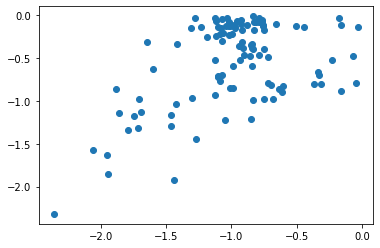

In [26]:
plt.scatter(df_bbox['trans_obj_width'],df_bbox['trans_obj_height'] )

### K-Means clustering 

In [28]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
cluster_X = df_bbox.loc[:,['trans_obj_width', 'trans_obj_height']].values

### Elbow method to obtain optimal clusters

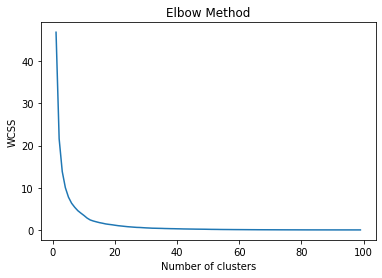

In [30]:
wcss = []
max_clusters = 100
for i in range(1, max_clusters):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(cluster_X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, max_clusters), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Final K Selection

In [0]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(cluster_X)

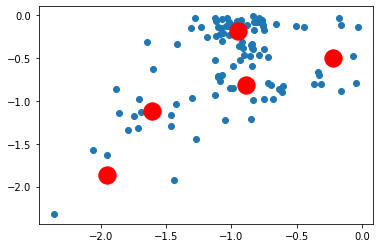

In [36]:
plt.scatter(cluster_X[:,0], cluster_X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [37]:
pd.DataFrame(pred_y).iloc[:,0].value_counts()

0    58
3    22
1    13
2    12
4     5
Name: 0, dtype: int64

In [38]:
pd.DataFrame(pred_y).iloc[:,0].value_counts()

0    58
3    22
1    13
2    12
4     5
Name: 0, dtype: int64

In [41]:
np.exp(kmeans.cluster_centers_[:])

array([[0.387916  , 0.83508725],
       [0.20012615, 0.32831088],
       [0.80063293, 0.6035267 ],
       [0.41191732, 0.44454859],
       [0.1422432 , 0.15556336]])

In [0]:
df_bbox.to_csv('/content/drive/My Drive/EVA4/tiny_imagenet/EVA4S12_Imgs/s12eva4.csv')

In [0]:
data_proj.keys()

dict_keys(['adutta_swan.jpg-1', 'wikimedia_death_of_socrates.jpg-1', '00000000.jpg16850', '00000001.jpg21502', '00000002.jpg21970', '00000003.jpg13726', '00000004.jpg16902', '00000005.jpg23937', '00000006.jpg26128', '00000007.jpg26836', '00000008.jpg21986', '00000009.jpg21697', '00000010.jpg20431', '00000011.jpg16699', '00000012.jpg21547', '00000013.jpg15142', '00000014.jpg26567', '00000015.jpg20723', '00000016.jpg26342', '00000017.jpg15516', '00000018.jpg19252', '00000019.jpg20528', '00000020.jpg16071', '00000021.jpg19626', '00000022.jpg27479', '00000023.jpg17659', '00000024.jpg9585', '00000025.jpg13441', '00000026.jpg18292', '00000027.jpg23521', '00000028.jpg16346', '00000029.jpg22274', '00000030.jpg19732', '00000031.jpg13710', '00000032.jpg14504', '00000033.jpg14476', '00000034.jpg15854', '00000035.jpg18718', '00000036.jpg13838', '00000038.jpg18468', '00000039.jpg28901', '00000040.jpg23454', '00000041.jpg17099', '00000042.jpg8479', '00000043.jpg21303', '00000044.jpg17232', '00000045

In [0]:
data_proj['00000067.jpg29001'].keys()

dict_keys(['filename', 'size', 'regions', 'file_attributes'])

In [0]:
data_proj[list(data_proj.keys())[0]]

{'file_attributes': {'caption': 'Swan in lake Geneve',
  'image_url': 'http://www.robots.ox.ac.uk/~vgg/software/via/images/swan.jpg',
  'public_domain': 'no'},
 'filename': 'adutta_swan.jpg',
 'regions': [{'region_attributes': {'image_quality': {'good_illumination': True},
    'name': 'Swan',
    'type': 'bird'},
   'shape_attributes': {'all_points_x': [116,
     94,
     176,
     343,
     383,
     385,
     369,
     406,
     398,
     364,
     310,
     297,
     304,
     244,
     158],
    'all_points_y': [157,
     195,
     264,
     273,
     261,
     234,
     222,
     216,
     155,
     124,
     135,
     170,
     188,
     170,
     175],
    'name': 'polygon'}}],
 'size': -1}

In [0]:
data_proj['00000067.jpg29001']

{'file_attributes': {'caption': '', 'image_url': '', 'public_domain': 'no'},
 'filename': '00000067.jpg',
 'regions': [{'region_attributes': {'image_quality': {'frontal': True,
     'good': True,
     'good_illumination': True},
    'name': 'dog',
    'type': 'unknown'},
   'shape_attributes': {'height': 108,
    'name': 'rect',
    'width': 108,
    'x': 94,
    'y': 52}}],
 'size': 29001}